In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

In [4]:
plt.rc('font', family='Malgun Gothic')

## 상관관계 데이터셋 구축

In [4]:
#순이동
df = pd.read_csv("./데이터/인구 데이터/시군구별 이동자수.csv", encoding='cp949')

In [5]:
df = df.drop("단위", axis=1)
df = df[df["항목"] == "순이동[명]"]
df = df.drop("항목", axis =1)

In [7]:
move_df = df

In [8]:
#공시지가
df = pd.read_csv("./데이터/아파트 가격/공시지가.csv")

In [9]:
df = df.drop("Unnamed: 0", axis =1)

In [13]:
price_df = df

In [15]:
#소멸위험지수
df = pd.read_csv("./데이터/인구 데이터/서울시 지역별 성별 연령별 주민등록 인구수.csv")
df["20-39여성"] = df.iloc[:, 137:157].sum(axis=1)
df["65세이상남자"] = df.iloc[:, 71:117].sum(axis=1)
df["65세이상여자"] = df.iloc[:, 182:228].sum(axis=1)
df["소멸위험지수"] = df["20-39여성"] / (df["65세이상남자"] + df["65세이상여자"])
df = df[["시군구명", "읍면동명", "통계년월", "소멸위험지수"]]

In [17]:
danger_df = df

## 소멸위험지수와 공시지가의 관계

In [18]:
#2022년 동별
a = danger_df.copy()
b = price_df.copy()

In [22]:
a = a[a["통계년월"] == "2022-08-22"]

In [31]:
a

,시군구명,읍면동명,통계년월,소멸위험지수
0,종로구,청운동,2022-08-22,0.589242
1,종로구,신교동,2022-08-22,0.906103
2,종로구,궁정동,2022-08-22,1.046512
3,종로구,효자동,2022-08-22,0.989011
4,종로구,창성동,2022-08-22,0.736264
...,...,...,...,...
452,강동구,둔촌동,2022-08-22,0.790270
453,강동구,암사동,2022-08-22,0.773737
454,강동구,성내동,2022-08-22,0.891198
455,강동구,천호동,2022-08-22,0.886625


In [32]:
b

법정동명
가락동     7.228325e+06
가리봉동    3.618488e+06
가산동     3.283834e+06
가양동     4.120376e+06
가회동     5.830061e+06
            ...     
후암동     4.970125e+06
훈정동     2.811047e+06
휘경동     3.512721e+06
흑석동     5.166670e+06
흥인동     8.657742e+06
Name: 공시지가(원/㎡), Length: 465, dtype: float64

In [25]:
b = b[b["기준년월"] == "2022-01-01"]

In [27]:
b = b.groupby(["법정동명"])["공시지가(원/㎡)"].mean()

In [38]:
c = pd.merge(a, b, left_on="읍면동명", right_on="법정동명")

In [42]:
c

,시군구명,읍면동명,통계년월,소멸위험지수,공시지가(원/㎡)
0,종로구,청운동,2022-08-22,0.589242,3.264165e+06
1,종로구,신교동,2022-08-22,0.906103,3.398297e+06
2,종로구,궁정동,2022-08-22,1.046512,3.545080e+06
3,종로구,효자동,2022-08-22,0.989011,4.550903e+06
4,종로구,창성동,2022-08-22,0.736264,5.193993e+06
...,...,...,...,...,...
452,강동구,둔촌동,2022-08-22,0.790270,3.221827e+06
453,강동구,암사동,2022-08-22,0.773737,3.491900e+06
454,강동구,성내동,2022-08-22,0.891198,5.333508e+06
455,강동구,천호동,2022-08-22,0.886625,5.100748e+06


In [43]:
heatmap_data = c[["소멸위험지수", "공시지가(원/㎡)"]]

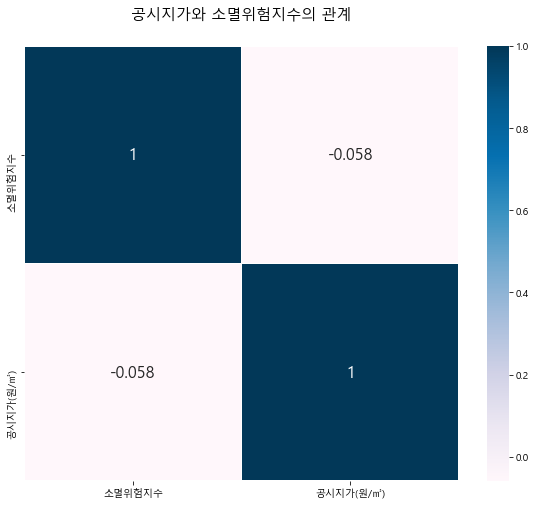

In [47]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("공시지가와 소멸위험지수의 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

## 순이동과 공시지가의 관계

In [127]:
#2022년 구 단위
a = move_df.copy()
b = price_df.copy()

In [128]:
a = a[["행정구역(시군구)별", "2021.01 월","2021.02 월","2021.03 월","2021.04 월","2021.05 월","2021.06 월","2021.07 월","2021.08 월","2021.09 월","2021.10 월","2021.11 월","2021.12 월"]]

In [129]:
a["순이동 총합"] = a.iloc[:, 1:13].sum(axis=1)

In [132]:
a = a[["행정구역(시군구)별", "순이동 총합"]]

In [133]:
b = b[b["기준년월"] == "2022-01-01"]

In [134]:
b = b.groupby(["시군구명"])["공시지가(원/㎡)"].mean()

In [135]:
c = pd.merge(a, b, left_on="행정구역(시군구)별", right_on="시군구명")

In [136]:
c

,행정구역(시군구)별,순이동 총합,공시지가(원/㎡)
0,종로구,-2224,6.283933e+06
1,중구,-1209,1.050765e+07
2,용산구,-3561,7.270912e+06
3,성동구,-6244,5.044931e+06
4,광진구,-5228,4.659479e+06
5,동대문구,-2076,3.987227e+06
6,중랑구,-5090,3.169617e+06
7,성북구,-3340,3.361407e+06
8,강북구,-5904,2.759774e+06
9,도봉구,-5787,2.507295e+06


In [137]:
heatmap_data = c[["순이동 총합", "공시지가(원/㎡)"]]

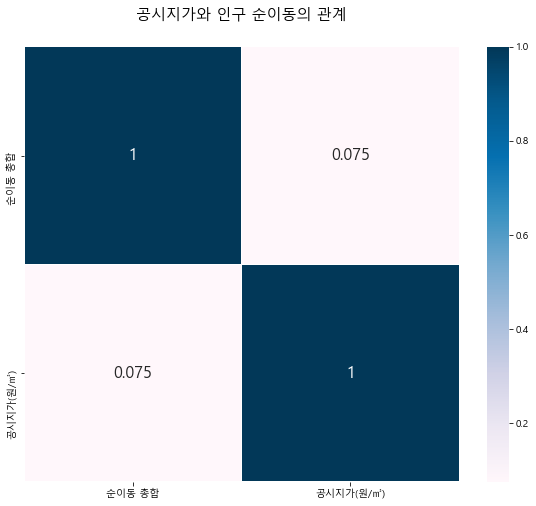

In [138]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("공시지가와 인구 순이동의 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

## 순이동과 소멸위험지수의 관계

In [ ]:
#2022년 구별

In [94]:
a

,행정구역(시군구)별,합
2,종로구,-2224
10,중구,-1209
18,용산구,-3561
26,성동구,-6244
34,광진구,-5228
42,동대문구,-2076
50,중랑구,-5090
58,성북구,-3340
66,강북구,-5904
74,도봉구,-5787


In [139]:
b = danger_df.copy()

In [140]:
b = b[b["통계년월"] == "2022-01-31"]

In [141]:
b = b.replace([np.inf, np.nan], b[b["시군구명"] == '종로구']["소멸위험지수"].median())

In [142]:
b = b.groupby(["시군구명"])["소멸위험지수"].mean()

In [143]:
c = pd.merge(a, b, left_on="행정구역(시군구)별", right_on="시군구명")

In [144]:
heatmap_data = c[["순이동 총합", "소멸위험지수"]]

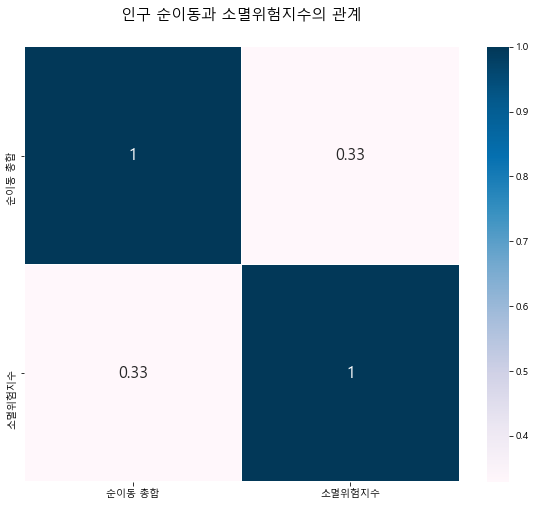

In [145]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("인구 순이동과 소멸위험지수의 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

## 총 인구수와 상관관계

In [148]:
population_df = df[["시군구명", "읍면동명", "계", "통계년월"]]

In [149]:
population_df

,시군구명,읍면동명,계,통계년월
0,종로구,청운동,2314,2022-08-22
1,종로구,신교동,1397,2022-08-22
2,종로구,궁정동,252,2022-08-22
3,종로구,효자동,574,2022-08-22
4,종로구,창성동,446,2022-08-22
...,...,...,...,...
3200,강동구,둔촌동,24760,2022-01-31
3201,강동구,암사동,67598,2022-01-31
3202,강동구,성내동,66439,2022-01-31
3203,강동구,천호동,86351,2022-01-31


In [ ]:
#인구와 순이동 - 구 (따로)
#인구와 소멸위험지수 - 동
#인구와 공시지가 - 동

In [164]:
b = population_df.copy() 

In [165]:
b

,시군구명,읍면동명,계,통계년월
0,종로구,청운동,2314,2022-08-22
1,종로구,신교동,1397,2022-08-22
2,종로구,궁정동,252,2022-08-22
3,종로구,효자동,574,2022-08-22
4,종로구,창성동,446,2022-08-22
...,...,...,...,...
3200,강동구,둔촌동,24760,2022-01-31
3201,강동구,암사동,67598,2022-01-31
3202,강동구,성내동,66439,2022-01-31
3203,강동구,천호동,86351,2022-01-31


In [166]:
b = b[b["통계년월"] == '2022-01-31']

In [167]:
b = b.groupby(["시군구명"])['계'].mean()

In [168]:
move_a = a #순이동 구 단위

In [169]:
c = pd.merge(move_a, b, left_on="행정구역(시군구)별", right_on="시군구명")

In [170]:
c

,행정구역(시군구)별,순이동 총합,계
0,종로구,-2224,1700.505882
1,중구,-1209,1698.819444
2,용산구,-3561,6546.264706
3,성동구,-6244,16795.058824
4,광진구,-5228,48571.714286
5,동대문구,-2076,33741.900000
6,중랑구,-5090,64599.666667
7,성북구,-3340,11027.538462
8,강북구,-5904,74681.750000
9,도봉구,-5787,79287.500000


In [171]:
heatmap_data = c[["순이동 총합", "계"]]

C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


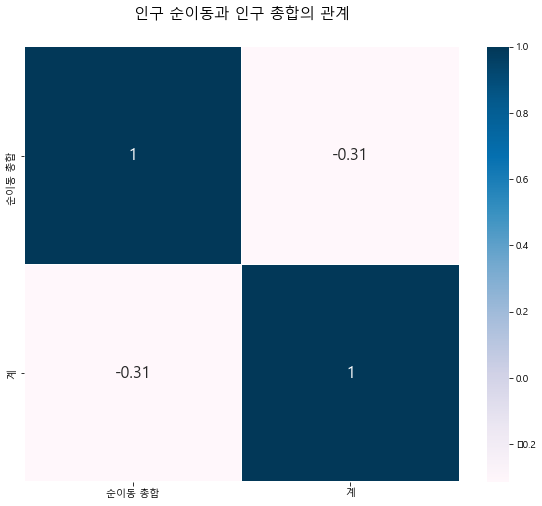

In [172]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("인구 순이동과 인구 총합의 관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [174]:
#동별 인구로 묶기
b = population_df.copy() 

In [175]:
b = b[b["통계년월"] == '2022-01-31']

In [177]:
pop = b

In [184]:
pop

,시군구명,읍면동명,계,통계년월
2747,종로구,청운동,2335,2022-01-31
2748,종로구,신교동,1410,2022-01-31
2749,종로구,궁정동,269,2022-01-31
2750,종로구,효자동,602,2022-01-31
2751,종로구,창성동,450,2022-01-31
...,...,...,...,...
3200,강동구,둔촌동,24760,2022-01-31
3201,강동구,암사동,67598,2022-01-31
3202,강동구,성내동,66439,2022-01-31
3203,강동구,천호동,86351,2022-01-31


In [185]:
a

,시군구명,읍면동명,통계년월,소멸위험지수
0,종로구,청운동,2022-08-22,0.589242
1,종로구,신교동,2022-08-22,0.906103
2,종로구,궁정동,2022-08-22,1.046512
3,종로구,효자동,2022-08-22,0.989011
4,종로구,창성동,2022-08-22,0.736264
...,...,...,...,...
452,강동구,둔촌동,2022-08-22,0.790270
453,강동구,암사동,2022-08-22,0.773737
454,강동구,성내동,2022-08-22,0.891198
455,강동구,천호동,2022-08-22,0.886625


In [178]:
a = danger_df.copy()
b = price_df.copy()

In [211]:
d = price_df.copy()

In [212]:
price_df

,시군구명,법정동명,공시지가(원/㎡),기준년월
0,성북구,하월곡동,640000,1990-01-01
1,강북구,수유동,1000000,1990-01-01
2,강북구,수유동,1100000,1990-01-01
3,강북구,수유동,1100000,1990-01-01
4,강북구,수유동,1200000,1990-01-01
...,...,...,...,...
31289562,성북구,종암동,3765000,2022-01-01
31289563,성북구,종암동,3485000,2022-01-01
31289564,성북구,종암동,6850000,2022-01-01
31289565,성북구,종암동,4125000,2022-01-01


In [213]:
d = d[d["기준년월"] == "2022-01-01"]
d = d.groupby(["시군구명"])["공시지가(원/㎡)"].mean()
d

시군구명
강남구     1.226813e+07
강동구     4.351465e+06
강북구     2.759774e+06
강서구     2.994489e+06
관악구     4.203577e+06
광진구     4.659479e+06
구로구     3.095948e+06
금천구     3.102373e+06
노원구     2.722523e+06
도봉구     2.507295e+06
동대문구    3.987227e+06
동작구     4.506925e+06
마포구     6.480667e+06
서대문구    3.983186e+06
서초구     7.403581e+06
성동구     5.044931e+06
성북구     3.361407e+06
송파구     6.290919e+06
양천구     3.582827e+06
영등포구    4.709922e+06
용산구     7.270912e+06
은평구     3.372155e+06
종로구     6.283933e+06
중구      1.050765e+07
중랑구     3.169617e+06
Name: 공시지가(원/㎡), dtype: float64

In [179]:
a = a[a["통계년월"] == "2022-08-22"]

In [180]:
b = b[b["기준년월"] == "2022-01-01"]

In [181]:
b = b.groupby(["법정동명"])["공시지가(원/㎡)"].mean()

In [190]:
a

,시군구명,읍면동명,통계년월,소멸위험지수
0,종로구,청운동,2022-08-22,0.589242
1,종로구,신교동,2022-08-22,0.906103
2,종로구,궁정동,2022-08-22,1.046512
3,종로구,효자동,2022-08-22,0.989011
4,종로구,창성동,2022-08-22,0.736264
...,...,...,...,...
452,강동구,둔촌동,2022-08-22,0.790270
453,강동구,암사동,2022-08-22,0.773737
454,강동구,성내동,2022-08-22,0.891198
455,강동구,천호동,2022-08-22,0.886625


In [208]:
c = pd.merge(pop.drop("통계년월", axis =1), a.drop("통계년월", axis =1))

In [215]:
c

,시군구명,읍면동명,계,소멸위험지수
0,종로구,청운동,2335,0.589242
1,종로구,신교동,1410,0.906103
2,종로구,궁정동,269,1.046512
3,종로구,효자동,602,0.989011
4,종로구,창성동,450,0.736264
...,...,...,...,...
452,강동구,둔촌동,24760,0.790270
453,강동구,암사동,67598,0.773737
454,강동구,성내동,66439,0.891198
455,강동구,천호동,86351,0.886625


In [217]:
final = pd.merge(c, d, left_on = '시군구명', right_on = '시군구명')

In [218]:
final

,시군구명,읍면동명,계,소멸위험지수,공시지가(원/㎡)
0,종로구,청운동,2335,0.589242,6.283933e+06
1,종로구,신교동,1410,0.906103,6.283933e+06
2,종로구,궁정동,269,1.046512,6.283933e+06
3,종로구,효자동,602,0.989011,6.283933e+06
4,종로구,창성동,450,0.736264,6.283933e+06
...,...,...,...,...,...
452,강동구,둔촌동,24760,0.790270,4.351465e+06
453,강동구,암사동,67598,0.773737,4.351465e+06
454,강동구,성내동,66439,0.891198,4.351465e+06
455,강동구,천호동,86351,0.886625,4.351465e+06


In [220]:
heatmap_data = final[["계", "소멸위험지수", "공시지가(원/㎡)"]]

C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chanw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


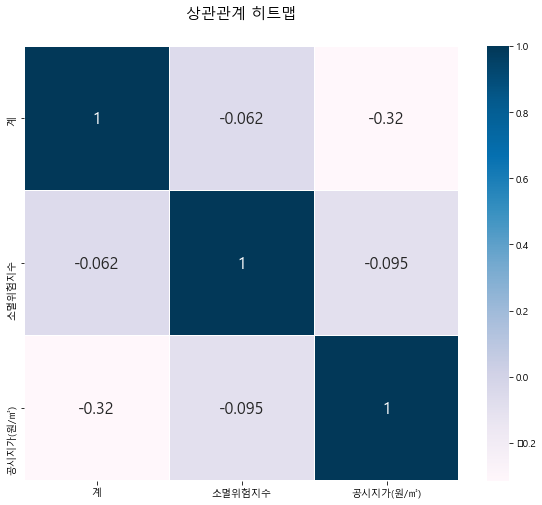

In [221]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("상관관계 히트맵", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})